In [1]:
#importing necessary libraries
from __future__ import print_function
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt
from imageai.Detection import VideoObjectDetection
import os
import sys
from random import randint
from math import ceil, sqrt
import natsort
import pandas as pd
import random
from keras.applications.vgg16 import VGG16
import pickle
from DataLoader import  DataGenerator

Using TensorFlow backend.
C:\Anaconda\envs\roadcross\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\envs\roadcross\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\envs\roadcross\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\envs\roadcross\lib\site-packages\tensorflow\python\framework\d

In [2]:
user = 'siddhi'

if user == 'siddhi':
    path_videos = 'C:/RoadCrossingAssistant/Data/Videos/'
    path_labels_csv = 'C:/RoadCrossingAssistant/Data/labels_framewise_csv.csv'
    path_labels_list = 'C:/RoadCrossingAssistant/Data/labels_framewise_list.pkl'
    path_frames = 'C:/RoadCrossingAssistant/Data/Frames/'

elif user == 'yagnesh':
    path_videos = '/home/yagnesh/Study/Machine Learning/ML projects/RoadCrossingAssistant_Arrays/videos/'
    path_labels_csv = '/home/yagnesh/Study/Machine Learning/ML projects/RoadCrossingAssistant_Arrays/labels_framewise.csv'
    path_labels_list = '/home/yagnesh/Study/Machine Learning/ML projects/RoadCrossingAssistant_Arrays/labels_framewise.pkl'


# frame-wise labels array
open_file = open(path_labels_list, "rb")
labels_list = pickle.load(open_file)
open_file.close()

In [11]:
#Perform train-test-validation split(62-24-18)

x = np.arange(1, 105)
np.random.shuffle(x)
#np.random.seed(42)
videos_validation = x[:18]
videos_test = x[18: 18+24]
videos_train = x[18+24: ]

# videos_train = [videos[ind] for ind in indices_train]
# videos_test = [videos[ind] for ind in indices_test]

# labels_train_loaded = [labels_list[ind] for ind in indices_train]
# labels_test_loaded = [labels_list[ind] for ind in indices_test]

# print('len of videos_train: ', len(videos_train))
# print('len of videos_test: ', len(videos_test))
# print('len of labels_train_loaded: ', len(labels_train_loaded))
# print('len of labels_test_loaded: ', len(labels_test_loaded))

print(videos_train, len(videos_train))
print(videos_test, len(videos_test))
print(videos_validation, len(videos_validation))


[  3  32  46  42  98  17  93  77  24  58  16  52  82  80 103  81  57  15
  48  99   1  91  34   8  90  89   6   4   2  55  21  69  29  33  11  25
  68  12 102  65  67  85  45  41  59  84  37  53  75 101  71   5  66  92
 104  96  61  36  10  86  28  22] 62
[ 63  54  18  19  60  44  64  27  56   7  70  83  97  76  87  31  50  39
  73 100  62  78  94  51] 24
[ 9 49 95 74 72 47 40 79 23 14 26 13 30 20 88 38 35 43] 18


In [4]:
# list_IDs = {}

# print(list_IDs)

# video_ids = list(range(1,105))

# for vid in video_ids:

#     video = path_videos + "video" + str(vid) + ".MOV"
#     #print("starting " + video)
#     cap = cv2.VideoCapture(video)
#     no_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#     cap.release()
#     cv2.destroyAllWindows() 
#     list_IDs[vid] = no_frames

# print(list_IDs)

# print(len(list_IDs))

{}
{1: 210, 2: 150, 3: 180, 4: 150, 5: 240, 6: 210, 7: 210, 8: 150, 9: 150, 10: 150, 11: 210, 12: 180, 13: 240, 14: 180, 15: 180, 16: 210, 17: 330, 18: 210, 19: 180, 20: 210, 21: 180, 22: 150, 23: 180, 24: 240, 25: 180, 26: 210, 27: 180, 28: 180, 29: 180, 30: 180, 31: 210, 32: 150, 33: 180, 34: 150, 35: 210, 36: 180, 37: 180, 38: 180, 39: 180, 40: 210, 41: 180, 42: 180, 43: 240, 44: 180, 45: 180, 46: 180, 47: 180, 48: 180, 49: 180, 50: 180, 51: 180, 52: 180, 53: 180, 54: 180, 55: 180, 56: 180, 57: 180, 58: 180, 59: 180, 60: 180, 61: 180, 62: 210, 63: 180, 64: 180, 65: 180, 66: 180, 67: 180, 68: 180, 69: 180, 70: 180, 71: 180, 72: 180, 73: 180, 74: 180, 75: 180, 76: 210, 77: 300, 78: 480, 79: 390, 80: 390, 81: 570, 82: 480, 83: 480, 84: 750, 85: 780, 86: 330, 87: 570, 88: 510, 89: 450, 90: 570, 91: 690, 92: 420, 93: 240, 94: 330, 95: 420, 96: 420, 97: 390, 98: 300, 99: 390, 100: 450, 101: 390, 102: 240, 103: 330, 104: 240}
104


In [12]:
list_IDs_train = {}
list_IDs_test = {}
list_IDs_validation = {}

for vid in videos_train:

    video = path_videos + "video" + str(vid) + ".MOV"
    #print("starting " + video)
    cap = cv2.VideoCapture(video)
    no_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cap.release()
    cv2.destroyAllWindows() 
    list_IDs_train[vid] = no_frames

for vid in videos_test:

    video = path_videos + "video" + str(vid) + ".MOV"
    #print("starting " + video)
    cap = cv2.VideoCapture(video)
    no_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cap.release()
    cv2.destroyAllWindows() 
    list_IDs_test[vid] = no_frames

for vid in videos_validation:

    video = path_videos + "video" + str(vid) + ".MOV"
    #print("starting " + video)
    cap = cv2.VideoCapture(video)
    no_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cap.release()
    cv2.destroyAllWindows() 
    list_IDs_validation[vid] = no_frames

print(list_IDs_train)
print(len(list_IDs_train))

print(list_IDs_test)
print(len(list_IDs_test))

print(list_IDs_validation)
print(len(list_IDs_validation))

{3: 180, 32: 150, 46: 180, 42: 180, 98: 300, 17: 330, 93: 240, 77: 300, 24: 240, 58: 180, 16: 210, 52: 180, 82: 480, 80: 390, 103: 330, 81: 570, 57: 180, 15: 180, 48: 180, 99: 390, 1: 210, 91: 690, 34: 150, 8: 150, 90: 570, 89: 450, 6: 210, 4: 150, 2: 150, 55: 180, 21: 180, 69: 180, 29: 180, 33: 180, 11: 210, 25: 180, 68: 180, 12: 180, 102: 240, 65: 180, 67: 180, 85: 780, 45: 180, 41: 180, 59: 180, 84: 750, 37: 180, 53: 180, 75: 180, 101: 390, 71: 180, 5: 240, 66: 180, 92: 420, 104: 240, 96: 420, 61: 180, 36: 180, 10: 150, 86: 330, 28: 180, 22: 150}
62
{63: 180, 54: 180, 18: 210, 19: 180, 60: 180, 44: 180, 64: 180, 27: 180, 56: 180, 7: 210, 70: 180, 83: 480, 97: 390, 76: 210, 87: 570, 31: 210, 50: 180, 39: 180, 73: 180, 100: 450, 62: 210, 78: 480, 94: 330, 51: 180}
24
{9: 150, 49: 180, 95: 420, 74: 180, 72: 180, 47: 180, 40: 210, 79: 390, 23: 180, 14: 180, 26: 210, 13: 240, 30: 180, 20: 210, 88: 510, 38: 180, 35: 210, 43: 240}
18


In [13]:
# Generators
training_generator = DataGenerator(list_IDs = list_IDs_train, folder_path = path_frames)
validation_generator = DataGenerator(list_IDs = list_IDs_validation, folder_path = path_frames)
testing_generator = DataGenerator(list_IDs = list_IDs_test, folder_path = path_frames)


In [63]:
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# #print(labels_train_reduced)
# y_train = to_categorical(labels_train_reduced, 2)
# y_test = to_categorical(labels_test_reduced, 2)
# #print(y_train)

# print(y_train.shape)

# datagen = ImageDataGenerator(rescale=1. / 255, brightness_range=[0.4, 1.5], channel_shift_range = 50)

# # train_generator = datagen.flow(frames_train,
# #                                y_train,
# #                                batch_size=16)

# # datagen = ImageDataGenerator(rescale=1./255.,validation_split=0.2)

# train_generator = datagen.flow(frames_train,
#                                y_train,
#                                batch_size=16,
#                                shuffle=True,
#                                subset='training')

# valid_generator = datagen.flow(frames_train,
#                                y_train,
#                                batch_size=16,
#                                subset='validation')



(255, 2)


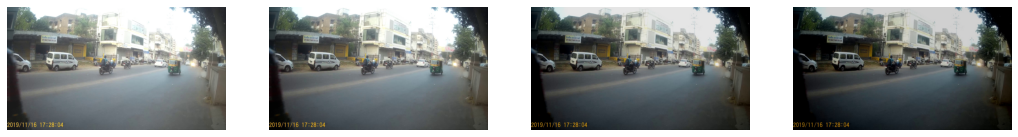

In [64]:
# from matplotlib.pyplot import imread, imshow, subplots, show
# def plot(data_generator):
#     """
#     Plots 4 images generated by an object of the ImageDataGenerator class.
#     """
#     data_generator.fit(images)
#     image_iterator = data_generator.flow(images)
    
#     # Plot the images given by the iterator
#     fig, rows = subplots(nrows=1, ncols=4, figsize=(18,18))
#     for row in rows:
#         row.imshow(image_iterator.next()[0].astype('int'))
#         row.axis('off')
#     show()

# image = imread("C:/RoadCrossingAssistant/Website/assets/img/approach_1.1_frames/fn1.jpg")

# # Creating a dataset which contains just one image.
# images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# #imshow(images[0])
# #show()

# data_generator = ImageDataGenerator(channel_shift_range = 50)
# plot(data_generator)

In [14]:
from tensorflow.keras.layers import Flatten, Dense
import keras
import tensorflow
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers 
from tensorflow.keras.applications import MobileNet

base_model = MobileNet(input_shape = (360, 640, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(2, activation='softmax')(x)

model = tensorflow.keras.models.Model(base_model.input, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=tensorflow.keras.optimizers.Adam(),
    metrics=['accuracy'])

model.summary()

C:\Anaconda\envs\roadcross\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 360, 640, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 361, 641, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 180, 320, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 180, 320, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)

In [7]:
#history = model.fit_generator(train_generator, shuffle='true', epochs=1, verbose=1, batch_size=16)

history = model.fit_generator(generator=training_generator, validation_data=validation_generator, epochs=1, verbose=1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0]
[0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0]
[1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0]
[1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1]
[0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1]
[1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1]
[0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1]
  2/666 [..............................] - ETA: 8:10:52 - loss: 1.4485 - acc: 0.6406 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 

KeyboardInterrupt: 

In [11]:
# import random
# from PIL import Image 

# dim = (1080, 1920)
# X = np.empty((4, *dim, 3))
# y = np.empty((4), dtype=int)

# video_ids = [2,3]

# c = 0

# for vid in video_ids:

#     frame_ids = random.sample(list(range(list_IDs_train[vid])), 2) # generate "no_frames_per_video" random frames
#             #max value of frame given by self.list_ids[vid]
#     labels_temp = np.load(path_frames + "video" + str(vid) + "/labels" + str(vid) + ".npy")

#     for fid in frame_ids:
#         im = Image.open(path_frames + "video" + str(vid) + "/frame" + str(fid) + ".jpg")

#         #X[c, ] = np. asarray(im)

#         d = np.asarray(im)
#         frame_resized = cv2.resize(d, (640, 360), interpolation = cv2.INTER_AREA)

#         print(d.shape, frame_resized.shape)
                
#         y[c] = labels_temp[fid]

#         c = c + 1

# print(c)

# print(X.shape, y.shape)

# print(y)

# print(keras.utils.to_categorical(y, num_classes=2))

(1080, 1920, 3) (360, 640, 3)
(1080, 1920, 3) (360, 640, 3)
(1080, 1920, 3) (360, 640, 3)
(1080, 1920, 3) (360, 640, 3)
4
(4, 1080, 1920, 3) (4,)
[0 1 0 0]
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [67]:
print("Evaluate on test data")
results = model.evaluate(testing_generator)
print("test loss, test acc:", results)

print("Evaluate on train data")
results = model.evaluate(training_generator)
print("train loss, trai acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
# print("Generate predictions")
# predictions = model.predict(frames_test)
# print("predictions shape:", predictions.shape)
# print(predictions[:10])




Evaluate on test data
567/567 [==============================] - 83s 147ms/sample - loss: 8.3812 - acc: 0.4550
test loss, test acc: [8.381198916695947, 0.45502645]
Generate predictions
predictions shape: (567, 2)


In [68]:
# from sklearn.metrics import average_precision_score
# average_precision = average_precision_score(np.argmax(y_test, axis = 1), np.argmax(predictions, axis = 1))

# print('Average precision-recall score: {0:0.2f}'.format(
#       average_precision))

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
Average precision-recall score: 0.50


In [72]:
# x = np.array([0,0,1,1,1])
# vv = to_categorical(x)
# print(vv)
# np.argmax(a, axis = 1) 

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


array([0, 0, 1, 1, 1], dtype=int64)